 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [126]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [127]:
# Reading whale returns
whale_returns_csv = Path("Instructions/Starter_Code/Resources/whale_returns.csv")
# YOUR CODE HERE
whale_data = pd.read_csv(whale_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [128]:
# Count nulls
# YOUR CODE 
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [129]:
# Drop nulls
# YOUR CODE HERE
whale_data = whale_data.dropna()
whale_data.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [130]:
# Reading algorithmic returns
algo_returns_csv = Path("Instructions/Starter_Code/Resources/algo_returns.csv")
algo_data = pd.read_csv(algo_returns_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
# YOUR CODE HERE


In [131]:
# Count nulls
# YOUR CODE H# YOUR CODE HERE

algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [132]:
# Drop nulls
# YOUR CODE HERE
algo_data = algo_data.dropna()

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [151]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_history_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
# YOUR CODE HERE
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [134]:
# Check Data Types
# YOUR CODE HERE
sp500_data.dtypes

Close    object
dtype: object

In [135]:
for col in sp500_data:
    print(col)

Close


In [153]:
# Fix Data Types
# YOUR CODE HERE
sp500_data.columns=['sp500']
sp500_data['sp500'] = sp500_data['sp500'].str.replace('$', '')
sp500_data["sp500"] = sp500_data.sp500.astype(float)


In [137]:
sp500_data.dtypes

sp500    float64
dtype: object

In [157]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_returns = sp500_data.pct_change()

In [155]:
# Drop nulls
# YOUR CODE HERE
sp500_returns=sp500_data.dropna()
sp500_returns.isnull().sum()

sp500    0
dtype: int64

In [158]:
# Rename Column
# YOUR CODE HERE
sp500_returns.columns=["sp500"]
sp500_returns.head

<bound method NDFrame.head of                sp500
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
...              ...
2012-10-05  0.003469
2012-10-04  0.000322
2012-10-03 -0.007123
2012-10-02 -0.003611
2012-10-01 -0.000872

[1649 rows x 1 columns]>

## Combine Whale, Algorithmic, and S&P 500 Returns

In [159]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
master_df = pd.concat([whale_data, sp500_returns, algo_data], axis="columns", join="inner")
master_df.columns=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'sp500', 'Algo 1', 'Algo 2']

master_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.004408,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.001195,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,0.014378,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.003929,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,0.017254,-0.005447,0.001303


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

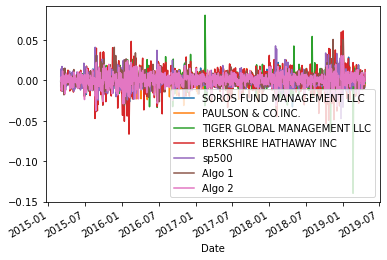

In [160]:
# Plot daily returns
# YOUR CODE HERE
master_df.plot()

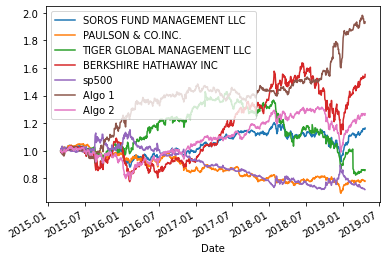

In [161]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + master_df).cumprod()
cumulative_returns.plot()


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

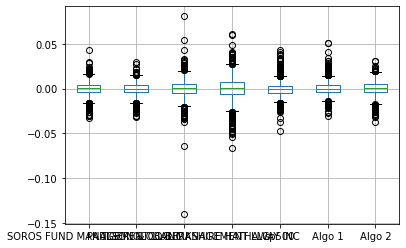

In [162]:
# Box plot to visually show risk
# YOUR CODE HERE
master_df.boxplot(column=None, by=None, ax=None, fontsize=None, rot=0, grid=True)

In [163]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
master_df.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
sp500                          0.008587
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

In [146]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
sp_std = master_df.std['sp500']
master_std= master_df.std()
def risk(master_std)['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'sp500', 'Algo 1', 'Algo 2']:
    for row in master_std:
        if row > .008587:
            print(f'row + 'true')
        elif row < .008587:
            print(f'row + 'false')
        else:
            print(f'row + "is sp500"')
risk(master_std)

SyntaxError: invalid syntax (<ipython-input-146-e00678426a7d>, line 5)

In [164]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
volatility = master_df.std()*np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
sp500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

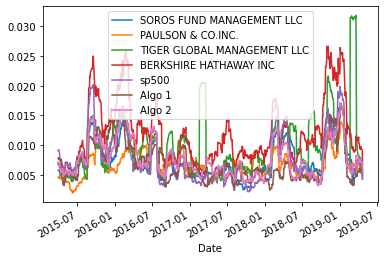

In [165]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
master_sma_20 = master_df.rolling(window=21).std().plot()


In [149]:
# Construct a correlation table
# YOUR CODE HERE
correlation = master_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.033918,0.321211,0.826873
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.036711,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,-0.047823,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.041547,0.292033,0.688082
sp500,0.033918,0.036711,-0.047823,0.041547,1.000000,-0.012608,0.036267
Algo 1,0.321211,0.268840,0.164387,0.292033,-0.012608,1.000000,0.288243
Algo 2,0.826873,0.678152,0.507414,0.688082,0.036267,0.288243,1.000000


In [47]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
covariance = master_df['Algo 1'].cov(master_df['sp500'])
covariance

-2.2230425517155273e-06

In [48]:
variance = master_df['Algo 1'].var()
variance

5.806747800961455e-05

In [49]:
algo_1_beta= covariance / variance
algo_1_beta

-0.03828377997314514

In [ ]:
rolling_Algo_1_covariance = master_df['Algo 1'].rolling(window=30).cov(master_df['sp500'])
rolling_Algo_1_covariance.plot(figsize=(20, 10), title = 'Rolling Algo 1 covariance vs sp500')

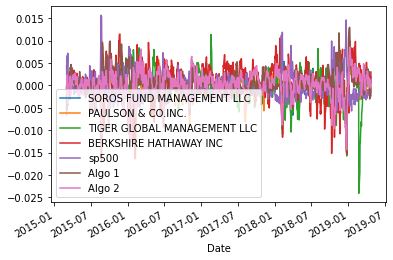

In [51]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE
master_ewm = master_df.ewm(span=10).mean()
master_ewm.plot()

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [53]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (master_df.mean() * 252) / (master_df.std() * np.sqrt(252))
print(sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
sp500                         -0.518582
Algo 1                         1.378648
Algo 2                         0.501364
dtype: float64


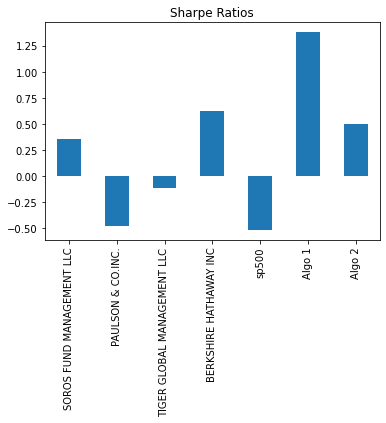

In [54]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [83]:
# Read the first stock
# YOUR CODE HERE
aapl_csv = Path('Instructions/my_portfolio/AAPL - Sheet1.csv')
aapl_data = pd.read_csv(aapl_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
aapl_data.columns=["aapl"]

aapl_returns = aapl_data.pct_change()
aapl_returns.head()

,aapl
Date,
2015-01-02 16:00:00,NaN
2015-01-05 16:00:00,-0.028174
2015-01-06 16:00:00,0.000377
2015-01-07 16:00:00,0.013925
2015-01-08 16:00:00,0.038233


In [84]:
# Read the second stock
# YOUR CODE HERE
amd_csv = Path('Instructions/my_portfolio/AMD - Sheet1.csv')
amd_data = sp500_data = pd.read_csv(amd_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
amd_data.columns=["amd"]
#amd_data["amd"] = amd_data.amd.astype(float)
amd_returns = amd_data.pct_change()
amd_returns.head()

,amd
Date,
2015-01-02 16:00:00,NaN
2015-01-05 16:00:00,-0.011152
2015-01-06 16:00:00,-0.011278
2015-01-07 16:00:00,-0.019011
2015-01-08 16:00:00,0.011628


In [85]:
# Read the third stock
# YOUR CODE HERE
amzn_csv = Path('Instructions/my_portfolio/AMZN - Sheet1.csv')
amzn_data = pd.read_csv(amzn_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)
amzn_data.columns=["amzn"]
amzn_returns = amzn_data.pct_change()
amzn_returns.head()

,amzn
Date,
2015-01-02 16:00:00,NaN
2015-01-05 16:00:00,-0.020517
2015-01-06 16:00:00,-0.022833
2015-01-07 16:00:00,0.010600
2015-01-08 16:00:00,0.006836


In [86]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
custom_portfolio=pd.concat([amzn_returns, amd_returns, aapl_returns], axis='columns', join='inner')
#custom_returns= custom_portfolio.pct_change()
custom_cumul_returns= (1 + custom_portfolio).cumprod()
#1 + custom_returns
custom_cumul_returns.head()

,amzn,amd,aapl
Date,,,
2015-01-02 16:00:00,NaN,NaN,NaN
2015-01-05 16:00:00,0.979483,0.988848,0.971826
2015-01-06 16:00:00,0.957118,0.977695,0.972192
2015-01-07 16:00:00,0.967263,0.959108,0.985730
2015-01-08 16:00:00,0.973875,0.970260,1.023417


In [87]:
# Reset the index
# YOUR CODE HERE
custom_portfolio.reset_index(inplace=True)
custom_portfolio['Date'] = pd.DatetimeIndex(custom_portfolio['Date']).normalize()

In [166]:
# Reset the index
# YOUR CODE HERE
custom_cumul_returns.reset_index(inplace=True)
custom_cumul_returns.head()
custom_cumul_returns['Date'] = pd.DatetimeIndex(custom_cumul_returns['Date']).normalize()

In [167]:
custom_portfolio.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [168]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
custom_cumul_returns.head()


,Date,amzn,amd,aapl
0,2015-01-02,NaN,NaN,NaN
1,2015-01-05,0.979483,0.988848,0.971826
2,2015-01-06,0.957118,0.977695,0.972192
3,2015-01-07,0.967263,0.959108,0.985730
4,2015-01-08,0.973875,0.970260,1.023417


In [169]:
# Drop Nulls
# YOUR CODE HERE
custom_portfolio= custom_portfolio.dropna()
custom_portfolio.isnull().sum()

amzn    0
amd     0
aapl    0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [170]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
custom_portfolio_weighted = custom_portfolio.dot(weights)
custom_portfolio_weighted.head()

Date
2015-01-05   -0.019948
2015-01-06   -0.011245
2015-01-07    0.001838
2015-01-08    0.018899
2015-01-09   -0.001004
dtype: float64

In [171]:
custom_portfolio_weighted.columns=['custom portfolio']

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [172]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
complete_df = pd.concat([master_df, custom_portfolio_weighted], sort=False, axis='columns', join="inner")


In [173]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
complete_df = complete_df.dropna()
complete_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
sp500                          0
Algo 1                         0
Algo 2                         0
0                              0
dtype: int64

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [174]:
# Risk
# YOUR CODE HERE
complete_volatility = complete_df.std() * np.sqrt(252)
complete_volatility.sort_values(inplace=True)
complete_volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
sp500                          0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
0                              0.311010
dtype: float64

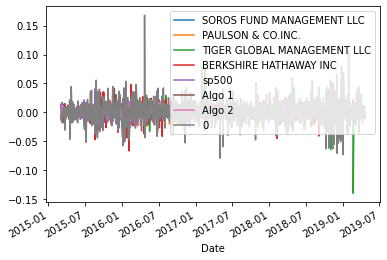

In [120]:
# Rolling
# YOUR CODE HERE
complete_df.plot()

In [107]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_complete = (complete_df.mean() * 252) / (complete_df.std() * np.sqrt(252))
print(sharpe_complete)

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
sp500                         -0.518582
Algo 1                         1.369589
Algo 2                         0.484334
0                              1.404896
dtype: float64


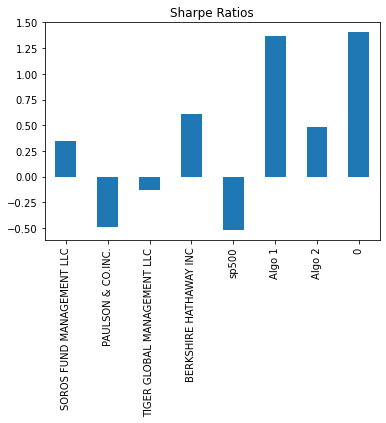

In [108]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_complete.plot(kind="bar", title="Sharpe Ratios")

In [109]:
# Create a correlation analysis
# YOUR CODE HERE
complete_df.corr()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,sp500,Algo 1,Algo 2,0
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.000574,0.320901,0.826730,0.583766
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.013549,0.268631,0.678085,0.448008
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,-0.001505,0.164114,0.507160,0.376231
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,-0.013856,0.291678,0.687756,0.604044
sp500,0.000574,0.013549,-0.001505,-0.013856,1.000000,-0.033963,-0.002192,-0.007262
Algo 1,0.320901,0.268631,0.164114,0.291678,-0.033963,1.000000,0.287852,0.186659
Algo 2,0.826730,0.678085,0.507160,0.687756,-0.002192,0.287852,1.000000,0.586235
0,0.583766,0.448008,0.376231,0.604044,-0.007262,0.186659,0.586235,1.000000


In [124]:
# Beta
# YOUR CODE HERE
covariance_custom = complete_df['custom portfolio'].cov(complete_df['sp500'])
covariance_custom

KeyError: 'custom portfolio'

In [ ]:
variance_custom = complete_df['custom portfolio'].var()
variance_custom

In [125]:
custom_beta= covariance_custom / variance_custom
custom_beta

NameError: name 'covariance_custom' is not defined